# Primer cuaderno para trabajar con Agent Based Models



Primero importamos todas las librerías que van a ser necesarias. He ido importando según las he ido necesitando

In [28]:
import random
from random import randint, random, choice
import numpy as np
import matplotlib.pyplot as plt

In [5]:
n = 1000 # number of agents
r = 0.1 # neighborhood radius
th = 0.5 # threshold for moving


## Se definen las clases

Probablemente esto es lo único diferente de lo que ya sabíais. Se define una clase, los agentes. Este es el modelo de Schelling (le dieron el premio Nobel por esta idea).
Se definen:
- una propiedad: 0,1. En el modelo de S, eran personas blancas y personas negras.
- Posición aleatoria en x e y.

In [7]:
class Agent:
    def __init__(self):
        self.type = randint(0, 1)   # dos tipos: 0 o 1
        self.x = random()           # posición inicial
        self.y = random()

## Se inicializan los agentes.

Se define una lista vacía (`agents`) y luego se rellena de agentes hasta $n$ agentes.  

In [8]:
def initialize(n):
    agents = []
    for i in range(n):
        agents.append(Agent())
    return agents

La primera manera es más clásica. La segunda manera de inicializar es más o menos igual, pero mas 'pithonica'

In [13]:
def initialize(n):
    return [Agent() for _ in range(n)]

Ejemplo de como usar la función

In [14]:
agents = initialize(n)
print(agents[0].type, agents[0].x, agents[0].y)

0 0.13448628538467333 0.2492387706892717


## Pintamos los agentes

La primera es algo más sencilla que la segunda. Esta segunda usa ax en lugar de plot, pero poco mas.

In [48]:
def observe1(agents):
    plt.cla()
    ax = plt.gca()
    ax.set_facecolor('0.85')
    white = [ag for ag in agents if ag.type == 0]
    black = [ag for ag in agents if ag.type == 1]
    plt.plot([ag.x for ag in white], [ag.y for ag in white], 'wo')
    plt.plot([ag.x for ag in black], [ag.y for ag in black], 'ko')
    plt.axis('image')
    plt.axis([0, 1, 0, 1])
    plt.show()


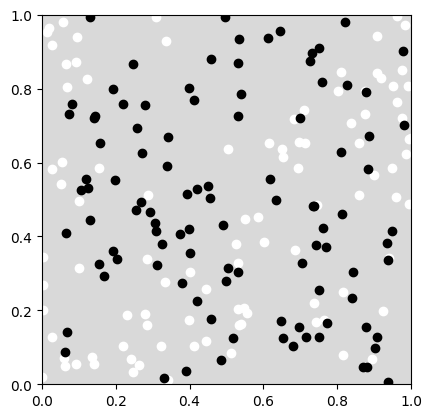

In [49]:
observe1(agents)

In [50]:
def observe(agents, ax):
    ax.cla()
    ax.set_facecolor('0.8')  # fondo gris

    white = [ag for ag in agents if ag.type == 0]
    black = [ag for ag in agents if ag.type == 1]

    ax.plot([ag.x for ag in white], [ag.y for ag in white], 'wo')
    ax.plot([ag.x for ag in black], [ag.y for ag in black], 'ko')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', 'box')
    ax.set_title('Modelo de segregación tipo Schelling')

In [51]:
observe(agents, ax)

## Corremos el modelo

Veamos los pasos de lo que hace el modelo:

1. Elegimos un agente de la lista de agentes al azar.
2. Buscamos los vecinos de ese agente.
3. Si no tiene vecinos, no hacemos nada.
4. Si tiene vecinos, de la lista de vecinos, buscamos los que sean del mismo tipo. Y calculamos un factor $q = \frac{numero-vecinos-tu-tipo}{numero-total-vecinos}$

5. Si $ q<th $, es decir, si ese factor es menor que un cierto umbral. Movemos al agente a otro sitio, a otro barrio de la ciudad.


In [45]:
def update(agents, r, th):
    ag = choice(agents)

    neighbors = [nb for nb in agents
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb is not ag]

    if not neighbors:
        return  # nadie alrededor, no hacemos nada

    same_type = [nb for nb in neighbors if nb.type == ag.type]
    q = len(same_type) / float(len(neighbors))

    if q < th:
        ag.x, ag.y = random(), random()

In [46]:
agents = initialize(n)
for step in range(n):
    update(agents, r=r, th=th)

## Hacemos la animación

Esto es ya para rizar el rizo y ver la animación.
En este caso es muy chula porque vemos que se forman patrones separandose por vecinos del mismo tipo.

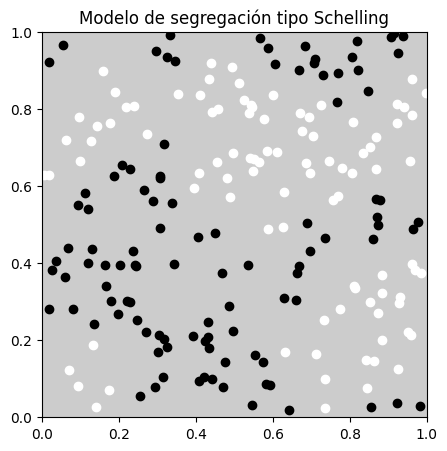

In [62]:
from matplotlib.animation import FuncAnimation, HTMLWriter
# ---------- Parámetros del modelo ----------
n = 200      # número de agentes
r = 0.1      # radio de vecindad
th = 0.5     # umbral de satisfacción

agents = initialize(n)

# ---------- Animación ----------

fig, ax = plt.subplots(figsize=(5, 5))

def animate(frame):
    # varias actualizaciones por frame para que evolucione más rápido
    for _ in range(10):
        update(agents, r, th)
    observe(agents, ax)
    return []

ani = FuncAnimation(fig, animate, frames=200, interval=50, blit=False)

# Guardar como GIF
#ani.save("segregacion.gif", writer="pillow")

ani.save("segregacion.mp4", writer="ffmpeg")
#ani.save("segregacion.html", writer="html")


In [63]:
from google.colab import files
files.download("segregacion.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>